<ipython-input-59-0a5ae1a21f50>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  company_sales = df_new.groupby('Company')['Units sold'].sum()
<ipython-input-59-0a5ae1a21f50>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  platform_sales = df_new.groupby(['Company', 'Platform'])['Units sold'].sum().reset_index()


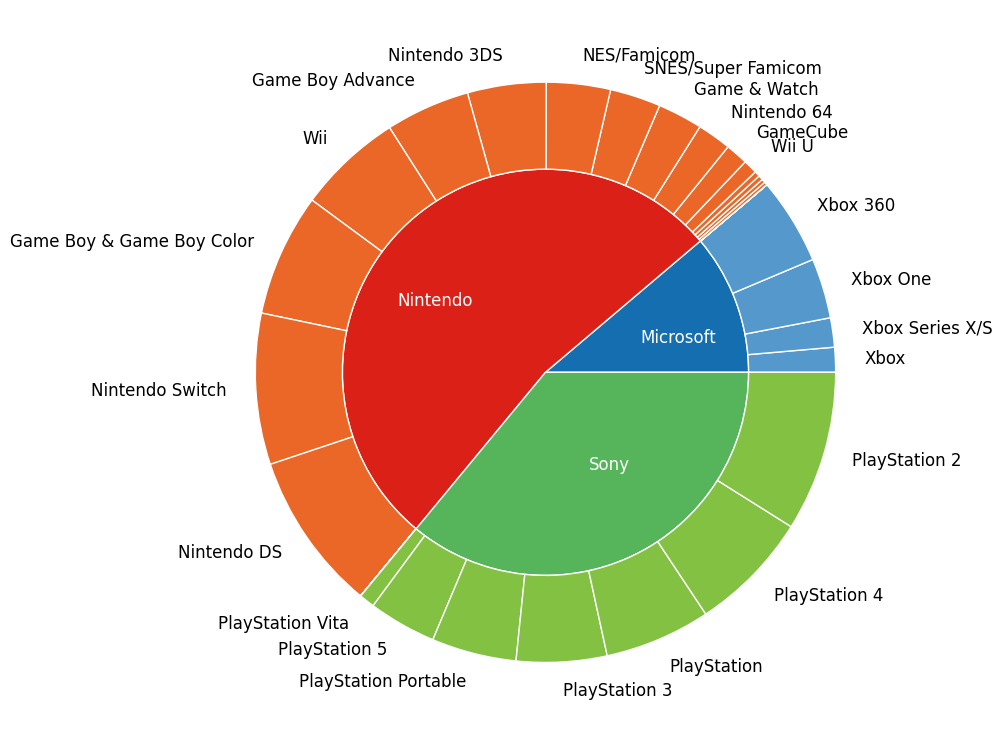

In [ ]:
######### Question 1 ##################


import pandas as pd
import matplotlib.pyplot as plt

#loading the csv file and organizing the data as needed
df = pd.read_csv('consoles.csv', usecols=['Platform', 'Company', 'Units sold'])
companies_order = ['Microsoft', 'Nintendo', 'Sony']

# organizing the data
group1 = df.iloc[0:7].copy()
group2 = df.iloc[7:23].copy()
group3 = df.iloc[23:27].copy()

# sorting and filtering the data
group1_sorted = group1.sort_values(by='Units sold', ascending=False)
group2_sorted = group2.sort_values(by='Units sold', ascending=False)
group3_sorted = group3.sort_values(by='Units sold', ascending=False)

df_new = pd.concat([group1_sorted, group2_sorted, group3_sorted], ignore_index=True)
df_new['Company'] = pd.Categorical(df_new['Company'], categories=companies_order, ordered=True)

# grouping according to need
company_sales = df_new.groupby('Company')['Units sold'].sum()
platform_sales = df_new.groupby(['Company', 'Platform'])['Units sold'].sum().reset_index()

# ordering
platform_sales = platform_sales.sort_values(['Company', 'Units sold'], ascending=[True,True])

# colour
inner_color_map = {'Microsoft': '#156EAF', 'Nintendo': '#DB2018', 'Sony': '#56B45B'}
outer_color_map = {'Microsoft': '#5599CC', 'Nintendo': '#EA6727', 'Sony': '#83C143'}

# creating plot
fig, ax = plt.subplots(figsize=(10,10))

# pie chart (inner)
inner_wedges, inner_texts = ax.pie(
    company_sales,
    radius=0.7,
    labels=company_sales.index,
    labeldistance=0.5,
    colors=[inner_color_map[c] for c in company_sales.index],
    wedgeprops=dict(edgecolor='white', linewidth=1),
    textprops={'color': 'white', 'fontsize': 12}
)

# donut chart (outer)
platform_labels = [
    row.Platform if row.Units_sold_percent > 0.5 else ''  # limiting labels
    for _, row in platform_sales.assign(
        Units_sold_percent=platform_sales['Units sold']/platform_sales['Units sold'].sum()*100
    ).iterrows()
]

outer_wedges, outer_texts = ax.pie(
    platform_sales['Units sold'],
    radius=1,
    labels=platform_labels,
    labeldistance=1.1,
    colors=[outer_color_map[row.Company] for _, row in platform_sales.iterrows()],
    wedgeprops=dict(width=0.3, edgecolor='white', linewidth=1),
    textprops={'color': 'black', 'fontsize': 12}
)

#cleaning up labels
for text in outer_texts:
    if text.get_text().strip() == '':
        text.set_visible(True)

plt.tight_layout()
plt.show()

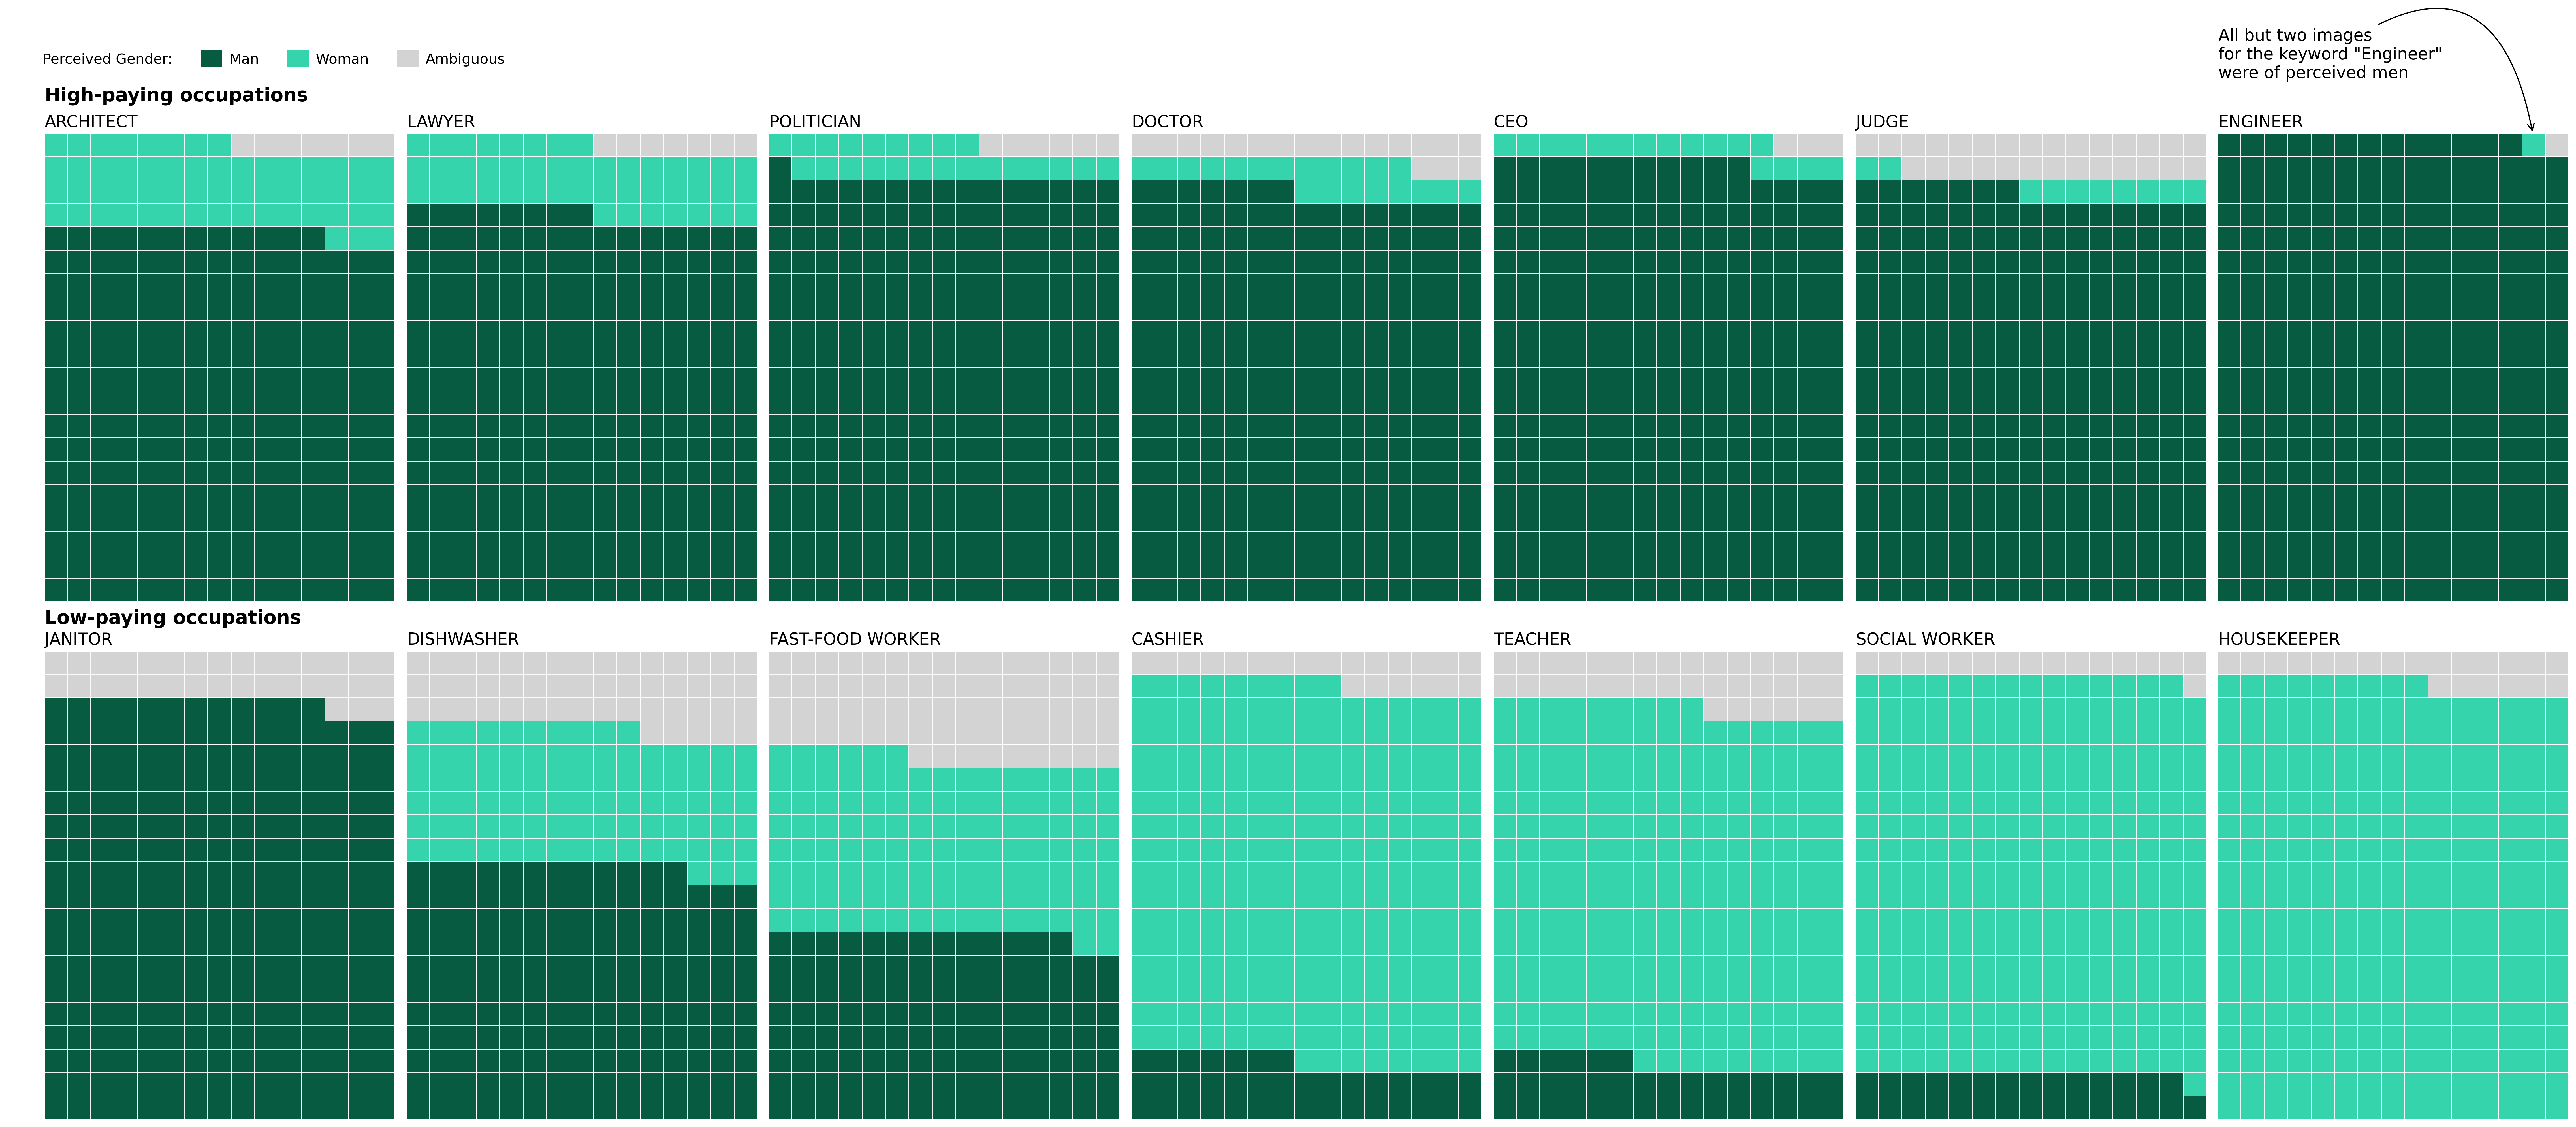

In [ ]:
######### Question 2 ###############


import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle

#loading csv file
df = pd.read_csv('gen-ai.csv')

# separating occupations
high_occupations = ['architect', 'lawyer', 'politician', 'doctor', 'ceo', 'judge', 'engineer']
low_occupations  = ['janitor', 'dishwasher', 'fast-food worker', 'cashier', 'teacher', 'social worker', 'housekeeper']

# filtering data
df_high = df[df['occupation'].isin(high_occupations)]
df_low  = df[df['occupation'].isin(low_occupations)]



plots= {}

#high-paying(top row(2,7,1) to (2,7,7))
for i, (_, row) in enumerate(df_high.iterrows(), start=1):
    plots[(2, 7, i)] = {
        'values': [row['man'], row['woman'], row['ambiguous']],
        'title': {'label': row['occupation'].upper(), 'loc': 'left', 'fontsize': 14}
    }

#low-paying(bottom row(2,7,8) to (2,7,14))
for i, (_, row) in enumerate(df_low.iterrows(), start=1):
    plots[(2, 7, i+7)] = {
        'values': [row['man'], row['woman'], row['ambiguous']],
        'title': {'label': row['occupation'].upper(), 'loc': 'left', 'fontsize': 14}
    }

#waffle
fig = plt.figure(
    FigureClass=Waffle,
    rows=20,
    columns=15,
    values=[],
    colors=['#065B41', '#36D4AC', '#D3D3D3'],
    vertical=True,
    block_aspect_ratio=1,
    interval_ratio_x=0.09,
    interval_ratio_y=0.09,
    figsize=(30, 15),
    dpi=300,
    plots=plots

)

#legend
dummy_handle = plt.Rectangle((0, 0), 1, 1, fc='none', ec='none', label='Perceived Gender:')

legend = fig.legend(
    handles=[
        dummy_handle,
        plt.Rectangle((0, 0), 1, 1, fc='#065B41', label='Man'),
        plt.Rectangle((0, 0), 1, 1, fc='#36D4AC', label='Woman'),
        plt.Rectangle((0, 0), 1, 1, fc='#D3D3D3', label='Ambiguous')
    ],
    loc='upper left',
    bbox_to_anchor=(-0.012, 0.96),
    ncol=4,
    frameon=False,
    fontsize=12,
    handlelength=1.5,  uare width
    handleheight=1.5,
    handletextpad=0.5
)

# titles
fig.text(0.005, 0.91, "High-paying occupations", fontsize=16, fontweight='bold', ha='left')
fig.text(0.005, 0.5, "Low-paying occupations", fontsize=16, fontweight='bold', ha='left')


#adding arrow
ax = fig.axes[6]
pos = ax.get_position()
text_x = pos.x0 - 0.02
text_y = pos.y1 + 0.02
ax.annotate(
    'All but two images\nfor the keyword "Engineer"\nwere of perceived men',
    xy=(0.90, 1),
    xytext=(0, 1.17),
    xycoords='axes fraction',
    textcoords='axes fraction',
    arrowprops=dict(
        arrowstyle='->',
        connectionstyle='arc3,rad=-0.8',
        color='black',
        linewidth=1
    ),
    fontsize=14,
    color='black',
    ha='left',
    va='center',
    clip_on=False
)


plt.subplots_adjust(wspace=0.2, hspace=0.05, left=0.12, top=0.88)
plt.savefig('occupations_combined.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#Attribute

#Question 1: Took help from AI to find a way to remove clutter but removing excess labels.

#Question 2: Took help from AI to make the legend waffle square instead of rectangle,
#            Took help from AI to figure out how to keep the plot stable while adding an arrow.
#            My approach was to make two different plots and join them, High paying and Low paying,
#            so took help from ai to fix the bugs when I tried to join the two plots.
